In [2]:
import numpy as np

In [620]:
#1
a = np.random.random((10, 3))
a[np.arange(10),(np.argmin(abs(a - 0.5), axis = 1))]

array([0.27519229, 0.64871537, 0.43972085, 0.26660561, 0.69477974,
       0.40636513, 0.94165453, 0.66193004, 0.41484908, 0.30659758])

In [621]:
#2
a = np.random.random((6, 6))
np.sum(a, axis = 1) / np.min(a, axis = 0)

array([ 11.2049606 ,  13.53462071, 133.80136981,  17.20140245,
        53.8818814 ,  12.08254754])

In [622]:
#3
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
np.max(x[(np.where(x == 0)[0] + 1)[(np.where(x == 0)[0] + 1) < len(x)]])

5

In [623]:
#4
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
x += np.bincount(i, minlength = len(x))
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [624]:
#5
def kmeans(obs, k, iter = 20, thresh = 10 **(-5)):
    centroids = obs[np.random.randint(0, len(obs), k)]
    old_distortion = 40
    distortion = 0
    h = np.arange(0, k)
    it = np.ones((k, len(obs)))
    it[h] = np.arange(0, len(obs))
    it = it.astype(int)
    dim = np.arange(obs[0].shape[0])
    while(abs(old_distortion - distortion) > thresh and iter > 0):
        old_distortion = distortion
        iter-=1
        dim_sum = sum(list(map(lambda v : (obs[it, v] - centroids[h, v].reshape(k, 1))**2, dim)))
        codebook = (dim_sum**(1/2)).argmin(axis = 0)
        for i in range(k):
            if (obs[codebook == i].any()):
                centroids[i] = np.mean(obs[codebook == i], axis = 0)
            else:
                centroids[i] = obs[np.random.randint(0, len(obs))]
        distortion = np.sum((dim_sum).min(axis = 0)) / obs.shape[0]
    return centroids, distortion


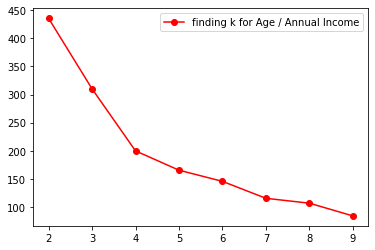

In [627]:
#helper function for ex.6
def get_cl(data, codebook):
    k = len(codebook)
    h = np.arange(0, k)
    it = np.ones((k, len(data)))
    it[h] = np.arange(0, len(data))
    it = it.astype(int)
    dim1 = (data[it, 0] - codebook[h, 0].reshape(k, 1))**2
    dim2 = (data[it, 1] - codebook[h, 1].reshape(k, 1))**2
    cl_id = ((dim1 + dim2)**(1/2)).argmin(axis = 0).astype(int)
    clusters = []
    for j in range(k):
        clusters.append(data[cl_id== j])
    return clusters
    
    
#6
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)

# Age / Annual Income
d = np.empty(10)
for i in range(2, 10):
    d[i] = kmeans(data[:,[2,3]], i)[1]
it = np.arange(2,10)
plt.plot(it, d[2:], 'o-r', label = 'finding k for Age / Annual Income')
plt.xticks(np.arange(2, 10, 1))
plt.legend()
plt.show()

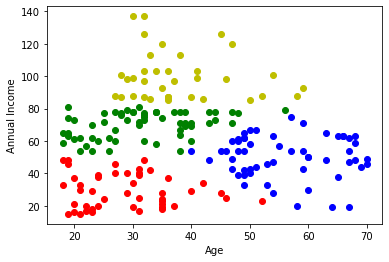

In [628]:
# k = 4
codebook, distortion = kmeans(data[:,[2,3]], 4)
clusters = get_cl(data[:,[2,3]], codebook)
plt.scatter(clusters[0][:,0], clusters[0][:,1], c='r')
plt.scatter(clusters[1][:,0], clusters[1][:,1], c='g')
plt.scatter(clusters[2][:,0], clusters[2][:,1], c='b')
plt.scatter(clusters[3][:,0], clusters[3][:,1], c='y')
#plt.scatter(clusters[4][:,0], clusters[4][:,1], c='grey')
#plt.scatter(clusters[5][:,0], clusters[5][:,1], c='orange')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

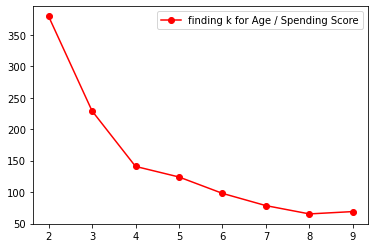

In [635]:
# Age / Spending Score
d = np.empty(10)
for i in range(2, 10):
    d[i] = kmeans(data[:,[2,4]], i)[1]
it = np.arange(2,10)
plt.plot(it, d[2:], 'o-r', label = 'finding k for Age / Spending Score')
plt.xticks(np.arange(2, 10, 1))
plt.legend()
plt.show()

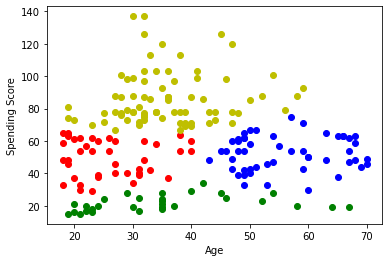

In [630]:
# k = 4
codebook, distortion = kmeans(data[:,[2,4]], 4)
clusters = get_cl(data[:,[2,3]], codebook)
plt.scatter(clusters[0][:,0], clusters[0][:,1], c='r')
plt.scatter(clusters[1][:,0], clusters[1][:,1], c='g')
plt.scatter(clusters[2][:,0], clusters[2][:,1], c='b')
plt.scatter(clusters[3][:,0], clusters[3][:,1], c='y')
#plt.scatter(clusters[4][:,0], clusters[4][:,1], c='grey')
#plt.scatter(clusters[5][:,0], clusters[5][:,1], c='orange')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

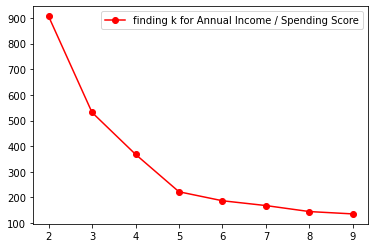

In [594]:
# Annual Income / Spending Score
d = np.empty(10)
for i in range(2, 10):
    d[i] = kmeans(data[:,[3,4]], i)[1]
it = np.arange(2,10)
plt.plot(it, d[2:], 'o-r', label = 'finding k for Annual Income / Spending Score')
plt.xticks(np.arange(2, 10, 1))
plt.legend()
plt.show()

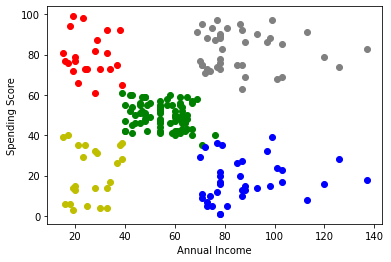

In [632]:
# k = 5
codebook, distortion = kmeans(data[:,[3,4]], 5)
clusters = get_cl(data[:,[3,4]], codebook)
plt.scatter(clusters[0][:,0], clusters[0][:,1], c='r')
plt.scatter(clusters[1][:,0], clusters[1][:,1], c='g')
plt.scatter(clusters[2][:,0], clusters[2][:,1], c='b')
plt.scatter(clusters[3][:,0], clusters[3][:,1], c='y')
plt.scatter(clusters[4][:,0], clusters[4][:,1], c='grey')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()